In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LinearRegression, BayesianRidge 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  

In [5]:
df=pd.read_csv(r'D:\Desktop\Semester 6\Pattern\lab\04_02_2025\Pattern_Rocognition_and_anomaly_detection_lab\Dataset\scrap price.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
df.shape

(205, 26)

In [10]:
df.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df['doornumbers']= df['doornumbers'].apply(lambda x: '4' if x == 'four' else '2')

In [12]:
df['doornumbers'].head()

0    2
1    2
2    2
3    4
4    4
Name: doornumbers, dtype: object

In [13]:
top_car_bodies= df['carbody'].value_counts().nlargest(2)

df['carbody']= df['carbody'].apply(lambda x: x if x in top_car_bodies else 'Others')

In [14]:
df['carbody'].head()

0       Others
1       Others
2    hatchback
3        sedan
4        sedan
Name: carbody, dtype: object

In [16]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,Others,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,Others,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [18]:
columns_to_remove = ['ID', 'name'] 
df = df.drop(columns=columns_to_remove, axis=1)

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [20]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [21]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [22]:
df.shape

(205, 42)

In [23]:
X = df.drop('price', axis=1)  
y = df['price'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print("R-squared Score:", r2)

R-squared Score: 0.8948578556126552


In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [30]:
mae = mean_absolute_error(y_test, y_pred)

In [31]:
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 2881.0316974734133
Mean Absolute Error (MAE): 1993.6573929293659


In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

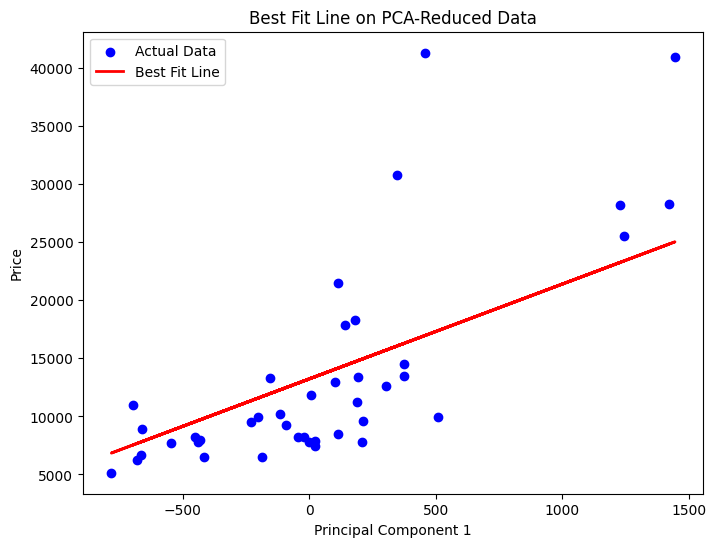

In [34]:
model.fit(X_train_pca, y_train)
y_pred_line = model.predict(X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca, y_test, color="blue", label="Actual Data")
plt.plot(X_test_pca, y_pred_line, color="red", linewidth=2, label="Best Fit Line")
plt.title("Best Fit Line on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
n_components = 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [38]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for each component: {explained_variance}")
print(f"Total Explained Variance (retained information): {np.sum(explained_variance)}")

Explained Variance Ratio for each component: [0.23923066]
Total Explained Variance (retained information): 0.2392306590629714


In [39]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [41]:
y_pred_pca = model.predict(X_test_pca)

In [42]:
mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

In [43]:
print("\nModel Performance with PCA:")
print("Root Mean Squared Error (RMSE):", rmse_pca)
print("Mean Absolute Error (MAE):", mae_pca)
print("R-squared Score (R2):", r2_pca)


Model Performance with PCA:
Root Mean Squared Error (RMSE): 4519.494562396855
Mean Absolute Error (MAE): 3217.1545321821277
R-squared Score (R2): 0.7412618350074682
